# Getting Started with Audio Data

#### Ryan Bales (@ryanbales)<br>ryan@balesofdata.com

***

### Import Packages

In [24]:
import librosa
import librosa.display
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#### Define Constants

In [25]:
num_mfccs = 20
max_feature_length = 128

train_data_path = "data/audio_train/train/"
val_data_path = "data/audio_train/validation/"

sample_file_path = "{}/{}".format("data", "Codemash_2019!.wav")

#### Review Audio File

In [3]:
import IPython.display as ipd
ipd.Audio(sample_file_path)

### Extracting Features from Audio Files

#### Let's take a look at the Librosa Python Library

In [26]:
raw_audio, sample_rate = librosa.load(sample_file_path, sr=None)

In [5]:
raw_audio

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -1.8310547e-04,  1.5258789e-05, -9.1552734e-05], dtype=float32)

In [6]:
raw_audio.shape

(221184,)

In [7]:
sample_rate

44100

#### Visualize the RAW Audio

Text(0.5, 1.0, 'RAW Audio')

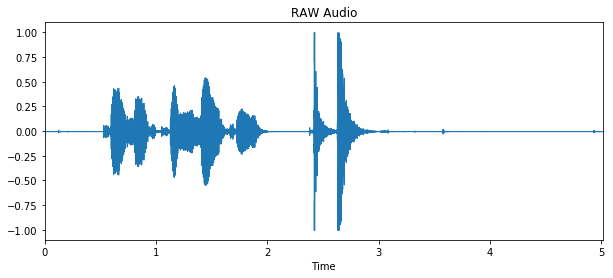

In [8]:
plt.figure(figsize=(10, 4))
librosa.display.waveplot(raw_audio, sr=sample_rate)
plt.title('RAW Audio')

#### Extract the Spectrogram

In [27]:
spec = librosa.feature.melspectrogram(y=raw_audio, sr=sample_rate, 
                                      n_fft=512, hop_length=256, n_mels=128)
spec

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.28828194e-11, 6.10633364e-08, 2.46996723e-07, ...,
        6.69256254e-07, 2.47954726e-08, 1.37521186e-07],
       [4.51823308e-11, 2.14159942e-07, 8.66261280e-07, ...,
        2.34720029e-06, 8.69621167e-08, 4.82311171e-07],
       ...,
       [2.30850729e-08, 2.90323908e-08, 2.81341150e-08, ...,
        3.34357350e-08, 1.87189843e-08, 2.05616941e-08],
       [7.87350269e-09, 2.18622049e-08, 2.11904788e-08, ...,
        3.43780692e-08, 2.51220957e-08, 7.85673635e-09],
       [6.27927410e-09, 1.47036733e-08, 2.71231165e-08, ...,
        1.77840749e-08, 3.25192469e-08, 3.74579374e-08]])

In [28]:
spec.shape

(128, 865)

### Convert the Spectrogram from Power to Decibels (dB)

In [29]:
spec_db = librosa.power_to_db(spec, ref=np.max)
spec_db

array([[-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -77.33789704,
        -80.        , -80.        ],
       [-80.        , -80.        , -76.2173324 , ..., -71.88831993,
        -80.        , -78.76054821],
       ...,
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ]])

In [30]:
spec_db.shape

(128, 865)

#### Visualize the Spectrogram

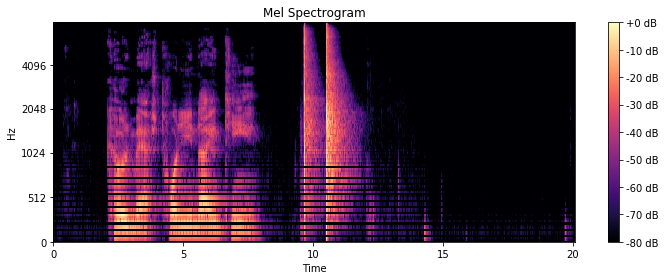

In [31]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(spec_db,y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()

#### Extract the Chromagram using Librosa

In [32]:
chroma = librosa.feature.chroma_stft(y=raw_audio, sr=sample_rate)

In [33]:
chroma

array([[0.959252  , 0.50414609, 0.44398891, ..., 0.43651316, 0.27621828,
        0.40054706],
       [0.80564377, 0.53241776, 0.46031372, ..., 0.30725065, 0.37045015,
        0.49699473],
       [0.92220918, 0.41349963, 0.4816905 , ..., 0.29092992, 0.54148677,
        0.86035648],
       ...,
       [0.67444255, 0.5494757 , 0.52074957, ..., 1.        , 0.26954447,
        0.60695439],
       [0.28694649, 0.28564683, 0.43727365, ..., 0.83004592, 0.33394659,
        0.76805329],
       [0.5708913 , 0.35301572, 0.45130836, ..., 0.54688377, 0.30975064,
        0.57022076]])

In [34]:
chroma.shape

(12, 433)

#### Visualize the Chromagam

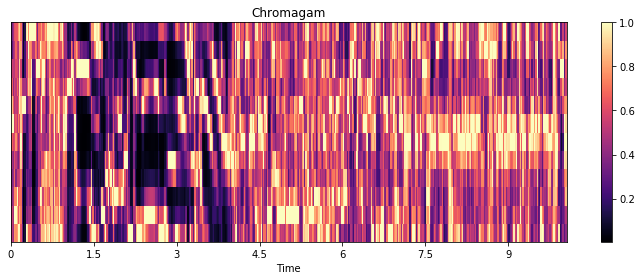

In [35]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, x_axis='time')
plt.colorbar()
plt.title('Chromagam')
plt.tight_layout()

#### Extract MFCCs using Librosa

In [36]:
mfccs = librosa.feature.mfcc(y=raw_audio, sr=sample_rate, n_mfcc=num_mfccs)

In [37]:
mfccs

array([[-5.92812079e+02, -5.90413347e+02, -5.88526093e+02, ...,
        -5.81057678e+02, -5.89357798e+02, -5.90986155e+02],
       [ 3.48261738e-01,  3.55661000e+00,  6.03129928e+00, ...,
         1.38768826e+01,  5.19632347e+00,  2.91372229e+00],
       [ 2.55246309e-01,  2.94372568e+00,  4.88769876e+00, ...,
         1.03028259e+01,  4.98922289e+00,  2.76881192e+00],
       ...,
       [ 1.07957730e-01,  6.94749485e-01, -8.76810666e-01, ...,
        -6.19608820e+00, -2.10906716e+00, -1.95508908e+00],
       [ 2.93085286e-02,  1.29233737e+00, -2.42510711e-01, ...,
        -3.89857914e+00, -2.21538141e+00, -2.22034327e+00],
       [-4.07400225e-02,  1.79918484e+00,  5.51986955e-01, ...,
        -4.38113745e+00, -2.28560874e+00, -2.42205213e+00]])

In [38]:
mfccs.shape

(20, 433)

#### Visualize the MFCCs

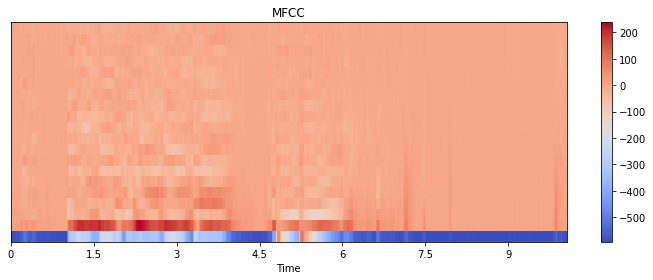

In [39]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()